# Principal Component Analysis

Principal Component Analysis (PCA) in the context of reducing the dimensionality of a dataset $ x $, where $ x $ is a $ d $-dimensional vector and $ \phi_i $ are the principal vectors (eigenvectors) in the $ d $-dimensional space. 

**Central Idea of PCA:**

PCA aims to transform a dataset $ x $ consisting of $ n $ data points, each represented as a $ d $-dimensional vector, into a new coordinate system where the axes (principal components) are orthogonal (or orthonormal) and ordered by the amount of variance they explain in the data.

**Key Concepts:**

- **_Principal Vectors ($ \phi_i $)_**: These are $ \phi_i $ vector that will obtain in optimum state that are the eigenvectors of the covariance matrix $ \Sigma $ of $ x $. They represent the directions along which the data varies the most (principal directions).

- **_Orthogonality and Normalization_**:
   - We assume that The principal vectors $ \phi_i $ are typically chosen to be orthogonal ($ \phi_i^T \phi_j = 0 $ for $ i \neq j $).
   - In some cases, they are also normalized ($ \|\phi_i\| = 1 $), forming an orthonormal basis.

- **_Linear Combination_**:
   - Each data point $ x $ can be expressed as a linear combination of the principal vectors $ \phi_i $:
   $$
   x = \sum_{i=1}^{d} y_i \phi_i
   $$
     where $ y_i = \phi_i^T x $ are the coordinates (or projections) of $ x $ onto the principal components $ \phi_i $.

- **_Dimensionality Reduction_**:
   - To reduce the dimensionality of $ x $, we can truncate the series after $ m $ principal components, retaining the most significant directions that capture the most variance in the data.
   - The reduced representation of $ x $ using the first $ m $ principal components is given by:
   $$
   \hat{x} = \sum_{i=1}^{m} y_i \phi_i
   $$

## Mathematical Formulation:

Given $ x $ is a $ d $-dimensional vector and $ \phi_i $ are $ d $-dimensional principal vectors:
- $ x $: Original data vector in $ \mathbb{R}^d $.
- $ \phi_i $: Principal vectors (eigenvectors) in $ \mathbb{R}^d $.
- $ y_i = \phi_i^T x $: Scalar projections of $ x $ onto $ \phi_i $.
- $ \hat{x} $: Approximation of $ x $ using $ m $ principal components.

### Residual Vector:

The residual vector $ \delta x $ is the difference between $ x $ and its projection $ \hat{x} $:

$$
\delta x = x - \hat{x} = \sum_{i=m+1}^{d} (y_i - b_i) \phi_i
$$

Here, $ b_i $ are coefficients chosen to minimize the residual $ E\left\{ \left\| \delta x  \right\|^{2} \right\}
 $, representing the remaining components not captured by the first $ m $ principal components.

### Expected Value of the Residual Norm:

To find the expected value of $ \| \delta x \| $, we consider the expectation over the residual components:

$$
J = E[\| \delta x \|^2] = E\left[\left\| \sum_{i=m+1}^{d} (y_i - b_i) \phi_i \right\|^2\right]
$$

Since $ \phi_i $ are orthonormal, $ \| \phi_i \| = 1 $.

### Simplification:

The norm squared of $ \delta x $ can be expressed as:

$$
E\left[\left\| \sum_{i=m+1}^{d} (y_i - b_i) \phi_i \right\|^2\right]
$$

$$
E\left\{ (\sum_{i=m+1}^{i=d} (y_i - b_i) \phi_i))^{T}(\sum_{i=m+1}^{i=d} (y_i - b_i) \phi_i)) \right\}
$$

because of orthogonality set of $\phi_i$

$$
E\| \delta x \|^2=\sum_{i=m+1}^{i=d} E(y_i - b_i)^{2} \phi_i^{T}\phi_i
$$

Since $ \| \phi_i \|^2 = 1 $, we have:

$$
\| \delta x \|^2 = \sum_{i=m+1}^{d} E(y_i - b_i)^2
$$

### Minimizing $ J $:

To minimize $ J = E[\| \delta x \|] $, we choose $ b_i $ such that $ b_i = E(y_i) $, which minimizes expectation of the residual norm $ \| \delta x \| $.
 
### Partial Derivative of $ J $ with respect to $ b_i $:

1. **Express $ J $ in Terms of $ b_i $**:
$$
J = \sum_{i=m+1}^{d} \mathbb{E}[(y_i - b_i)^2]
$$

2. **Differentiate $ J $ with respect to $ b_i $**:
   To find the derivative of $ J $ with respect to $ b_i $, we consider the derivative inside the expectation:

$$
\frac{\partial J}{\partial b_i} = \frac{\partial}{\partial b_i} \left( \mathbb{E}[(y_i - b_i)^2] \right)
$$

3. **Apply Chain Rule**:
  Using the chain rule, we get:

$$
\frac{\partial J}{\partial b_i} = -2 \mathbb{E}[y_i - b_i]
$$

4. **Expectation Simplification**:
   Since $ y_i $ is deterministic (not random) and $ b_i $ is the variable with respect to which we are differentiating:

$$
\frac{\partial J}{\partial b_i} = -2 \mathbb{E}[y_i - b_i]
$$

   $ b_i = E(y_i) $


### Substitution and Simplification of $ J $:

1. **Substitute $ y_i = \phi_i^T x $ and $ b_i = \phi_i^T \mathbb{E}[x] $** into $ J $:

$$
J = \sum_{i=m+1}^{d} (y_i - \mathbb{E}[y_i])^2
$$

$$
J = \sum_{i=m+1}^{d} \left( \phi_i^T x - \phi_i^T \mathbb{E}[x] \right)^2
$$

2. **Expand the square** and use the fact that $ \phi_i^T $ is a scalar (transpose of $ \phi_i $):

$$
J = \sum_{i=m+1}^{d} \left( \phi_i^T (x - \mathbb{E}[x]) \right)^2
$$

3. **Factor out $ (x - \mathbb{E}[x]) $**:

$$
J = \sum_{i=m+1}^{d} \left( \phi_i^T (x - \mathbb{E}[x]) \right)^2
$$

$$
J = \sum_{i=m+1}^{d} \phi_i^T (x - \mathbb{E}[x])(x - \mathbb{E}[x])^T \phi_i
$$

4. **Simplify using matrix multiplication**:

   Notice that $ (x - \mathbb{E}[x])(x - \mathbb{E}[x])^T $ is the covariance matrix $ \Sigma_x $ of $ x $:

$$
J = \sum_{i=m+1}^{d} \phi_i^T \Sigma_x \phi_i
$$

   Here, $ \Sigma_x = \mathbb{E}[(x - \mathbb{E}[x])(x - \mathbb{E}[x])^T] $ is the covariance matrix of $ x $.


To find the Lagrangian for $ J = \sum_{i=m+1}^{d} \phi_i^T \Sigma_x \phi_i $ with the constraint $ \phi_i^T \phi_i = 1 $, and then compute the partial derivative with respect to $ \phi_i $, follow these steps:

### Lagrangian Formulation:

1. **Lagrangian $ \mathcal{L} $**:
$$
\mathcal{L}(\phi_i, \lambda_i) = \sum_{i=m+1}^{d} \phi_i^T \Sigma_x \phi_i + \sum_{i=m+1}^{d} \lambda_i (1 - \phi_i^T \phi_i)
$$

   Here, $ \lambda_i $ are Lagrange multipliers associated with the constraints $ \phi_i^T \phi_i = 1 $.

2. **Objective Function with Constraints**:
   The objective is to minimize $ \mathcal{L} $ with respect to $ \phi_i $ under the orthogonality and normalization constraints.

### Partial Derivative with Respect to $ \phi_i $:

To find $ \frac{\partial \mathcal{L}}{\partial \phi_i} $:

$$
\frac{\partial \mathcal{L}}{\partial \phi_i} = 2 \Sigma_x \phi_i - 2 \lambda_i \phi_i
$$

Set the derivative equal to zero to find the critical point:

$$
2 \Sigma_x \phi_i - 2 \lambda_i \phi_i = 0
$$

$$
\Sigma_x \phi_i = \lambda_i \phi_i
$$

This equation resembles the eigenvalue problem where $ \lambda_i $ are the Lagrange multipliers, which correspond to the eigenvalues of $ \Sigma_x $, and $ \phi_i $ are the corresponding eigenvectors.




### Minimizing $ J $ with the Covariance Matrix Substitution

To find the minimum value of $ J $, given the substitution $ \Sigma_x \phi_i = \lambda_i \phi_i $, follow these steps:

**Lagrangian Substitution**:

Recall that $ J $ is given by:

$$
J = \sum_{i=m+1}^{d} \phi_i^T \Sigma_x \phi_i
$$

Using the eigenvalue equation $ \Sigma_x \phi_i = \lambda_i \phi_i $, we substitute $ \Sigma_x \phi_i $ in $ J $:

$$
J = \sum_{i=m+1}^{d} \phi_i^T (\lambda_i \phi_i)
$$

Since $ \phi_i^T \phi_i = 1 $:

$$
J = \sum_{i=m+1}^{d} \lambda_i \phi_i^T \phi_i
$$

$$
J = \sum_{i=m+1}^{d} \lambda_i
$$

**Selecting Principal Components**:

The objective is to minimize $ J $, which sums the eigenvalues $ \lambda_i $ for $ i > m $. To achieve this:

   - **Retain the Largest Eigenvalues**: We retain the principal components corresponding to the largest eigenvalues (those associated with the first $ m $ principal components). These eigenvalues capture the most variance in the data.

   - **Delete the Smallest Eigenvalues**: The smallest eigenvalues, which are the remaining eigenvalues after the first $ m $ components, are effectively minimized in the residual vector. Hence, these smaller eigenvalues should be excluded to minimize $ J $.

### PCA code

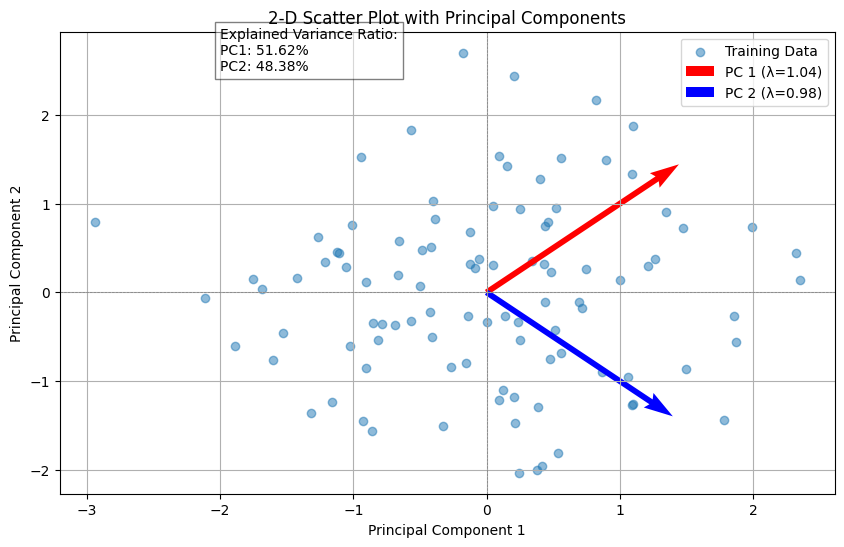

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Generate some sample data (for demonstration purposes)
np.random.seed(42)
data = np.random.randn(100, 2)  # 100 samples, 2 features for 2-D scatter plot

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Explained variance by each principal component
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Eigenvectors (principal components)
principal_components = pca.components_

# 2-D Scatter plot of the training data
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], alpha=0.5, label='Training Data')

# Plotting the eigenvectors
for i, (eigenvector, variance) in enumerate(zip(principal_components, explained_variance)):
    start, end = np.zeros(2), eigenvector * np.sqrt(variance) * 2  # Scale eigenvectors by sqrt of eigenvalues
    plt.quiver(*start, *end, angles='xy', scale_units='xy', scale=1, color=['r', 'b'][i], label=f'PC {i+1} (λ={variance:.2f})')

# Annotate explained variance ratio
plt.text(-2, 2.5, f'Explained Variance Ratio:\nPC1: {explained_variance_ratio[0]*100:.2f}%\nPC2: {explained_variance_ratio[1]*100:.2f}%', 
         bbox=dict(facecolor='white', alpha=0.5))

plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2-D Scatter Plot with Principal Components')
plt.legend()
plt.grid(True)
plt.show()


### Eigenvalue Spread in PCA

In Principal Component Analysis (PCA), the **eigenvalue spread** is defined as the ratio of the largest eigenvalue ($\lambda_{\max}$) to the smallest eigenvalue ($\lambda_{\min}$) of the covariance matrix of the dataset. This ratio provides insight into the variability captured by the principal components and the dimensionality of the data.

### Mathematical Definition

Given the covariance matrix $\Sigma_x$ of the dataset $X$:

$$
\Sigma_x = \frac{1}{n-1} X_{centered}^T X_{centered}
$$

where $X_{centered}$ is the centered data matrix (i.e., the mean of each feature subtracted from the data).

The eigenvalues $\lambda_1, \lambda_2, \ldots, \lambda_d$ of the covariance matrix are found by solving the eigenvalue equation:

$$
\Sigma_x \phi_i = \lambda_i \phi_i
$$

where $\phi_i$ are the corresponding eigenvectors.

The eigenvalue spread is given by:

$$
\text{Eigenvalue Spread} = \frac{\lambda_{\max}}{\lambda_{\min}}
$$

where:
- $\lambda_{\max}$ is the largest eigenvalue.
- $\lambda_{\min}$ is the smallest eigenvalue.

### Interpretation

**Large Eigenvalue Spread**: Indicates that the data variance is dominated by a few principal components. This suggests that the dataset is highly anisotropic, meaning the data is stretched more in some directions than others.
**Small Eigenvalue Spread**: Indicates that the data variance is more evenly distributed across the principal components, suggesting a more isotropic dataset.

### Importance in PCA

- **Dimensionality Reduction**: A large eigenvalue spread allows for effective dimensionality reduction by selecting a subset of principal components that capture most of the variance in the data.
- **Noise and Signal Separation**: A high eigenvalue spread often means that the smaller eigenvalues may represent noise, while the larger eigenvalues capture the significant signal in the data.

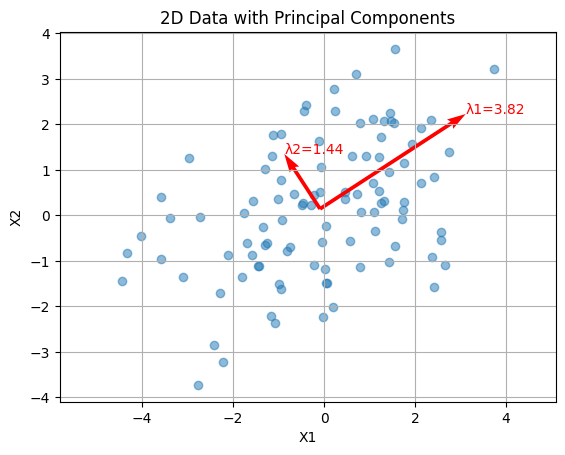

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
mean = [0, 0]
cov = [[3, 1], [1, 2]]  # covariance matrix
data = np.random.multivariate_normal(mean, cov, 100)

# Center the data
data_mean = np.mean(data, axis=0)
data_centered = data - data_mean

# Compute covariance matrix
cov_matrix = np.cov(data_centered.T)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Plot data
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)

# Plot eigenvectors
for i in range(len(eigenvalues)):
    eig_vec = eigenvectors[:, i]
    eig_val = eigenvalues[i]
    plt.quiver(data_mean[0], data_mean[1], eig_vec[0] * eig_val, eig_vec[1] * eig_val,
               angles='xy', scale_units='xy', scale=1, color='r')

# Annotate eigenvalues
for i in range(len(eigenvalues)):
    eig_vec = eigenvectors[:, i]
    eig_val = eigenvalues[i]
    plt.text(data_mean[0] + eig_vec[0] * eig_val, data_mean[1] + eig_vec[1] * eig_val,
             f'λ{i+1}={eig_val:.2f}', color='r')

plt.title('2D Data with Principal Components')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.axis('equal')
plt.show()



## PCA on High Dimensional Data

### Mathematical Background

Given the initial image data $ X $, the goal is to use PCA for denoising. Let's go through the derivation.

1. **Center the Data**: 

$$
X_{\text{centered}} = X - \mu
$$

where $ \mu $ is the mean of the image data $ X $.

2. **Compute the Covariance Matrix**:

$$
\Sigma_X = X_{\text{centered}} X_{\text{centered}}^T
$$

3. **Eigenvalue Decomposition**:

$$
\Sigma_X \phi_i = \lambda_i \phi_i
$$

4. **Right Multiply by $ X_{\text{centered}}^T $**:

$$
\Sigma_X \phi_i = \lambda_i \phi_i
$$

$$
X_{\text{centered}}^T \Sigma_X \phi_i = \lambda_i X_{\text{centered}}^T \phi_i
$$

Substitute $ \hat{\phi_i} = X_{\text{centered}}^T \phi_i $:

$$
X_{\text{centered}}^T X_{\text{centered}} X_{\text{centered}}^T \phi_i = \lambda_i X_{\text{centered}}^T \phi_i
$$

$$
X_{\text{centered}}^T X_{\text{centered}} \hat{\phi_i} = \lambda_i \hat{\phi_i}
$$

$ \hat{\phi_i} for i=1:n $ (n is number of samples) calculates which are eigen vector of 

$$
X_{\text{centered}}^T X_{\text{centered}}
$$
   
on the other hand, multiply from left at following equation X

$$
X_{\text{centered}}^T X_{\text{centered}} \hat{\phi_i} = \lambda_i \hat{\phi_i}
$$

result:

$$
X_{\text{centered}}X_{\text{centered}}^T X_{\text{centered}} \hat{\phi_i} = \lambda_i X_{\text{centered}} \hat{\phi_i}
$$

So

$$
\phi_i=X_{\text{centered}} \hat{\phi_i}
$$

Therefore after obtaining $ \hat{\phi_i} $ using above equation can calculate $\phi_i$.

**Reconstruct the Image**:
$$
\hat{X} = \hat{\phi} Y + \mu
$$


## Denoising with PCA 
The following steps needs for data denoising using PCA:

- Center the data by subtracting the mean.
- Compute the covariance matrix of the centered data.
- Apply PCA to the centered data.
- Reconstruct the data using the principal components and stored mean.


### Center the Data by Subtracting the Mean

Given a dataset $ \mathbf{X} $ with $ n $ samples and $ d $ features, we first compute the mean of the data:

$$
\mathbf{\mu} = \frac{1}{n} \sum_{i=1}^n \mathbf{x}_i
$$

We then center the data by subtracting the mean vector from each data point:

$$
\mathbf{X}_{\text{centered}} = \mathbf{X} - \mathbf{\mu}
$$

### Compute the Covariance Matrix of the Centered Data

The covariance matrix $ \mathbf{\Sigma} $ of the centered data is calculated as follows:

$$
\mathbf{\Sigma} = \frac{1}{n} \mathbf{X}_{\text{centered}}^T \mathbf{X}_{\text{centered}}
$$

### Apply PCA to the Centered Data

Perform PCA by finding the eigenvalues and eigenvectors of the covariance matrix $ \mathbf{\Sigma} $:

$$
\mathbf{\Sigma} \mathbf{V} = \mathbf{V} \mathbf{\Lambda}
$$

Here, $ \mathbf{V} $ is the matrix of eigenvectors (principal components), and $ \mathbf{\Lambda} $ is the diagonal matrix of eigenvalues.

Transform the centered data to the principal component space:

$$
\mathbf{Z} = \mathbf{X}_{\text{centered}} \mathbf{V}
$$

### Reconstruct the Data Using the Principal Components

To reconstruct the data using the top $ m $ principal components, we truncate the eigenvectors and eigenvalues to include only the top $ m $ components:

$$
\mathbf{V}_m = \mathbf{V}[:, :m] $$
$$ \mathbf{\Lambda}_m = \mathbf{\Lambda}[:m, :m]
$$

The reconstructed data in the original space is given by:

$$
\hat{\mathbf{X}}_{\text{centered}} = \mathbf{Z}_m \mathbf{V}_m^T
$$

Where $ \mathbf{Z}_m = \mathbf{X}_{\text{centered}} \mathbf{V}_m $.

Finally, add the mean vector back to the reconstructed centered data to get the reconstructed data in the original scale:

$$
\hat{\mathbf{X}} = \hat{\mathbf{X}}_{\text{centered}} + \mathbf{\mu}
$$

### Estimate Noise

The noise in the data is estimated by subtracting the reconstructed data from the original data:

$$
\mathbf{N} = \mathbf{X} - \hat{\mathbf{X}}
$$

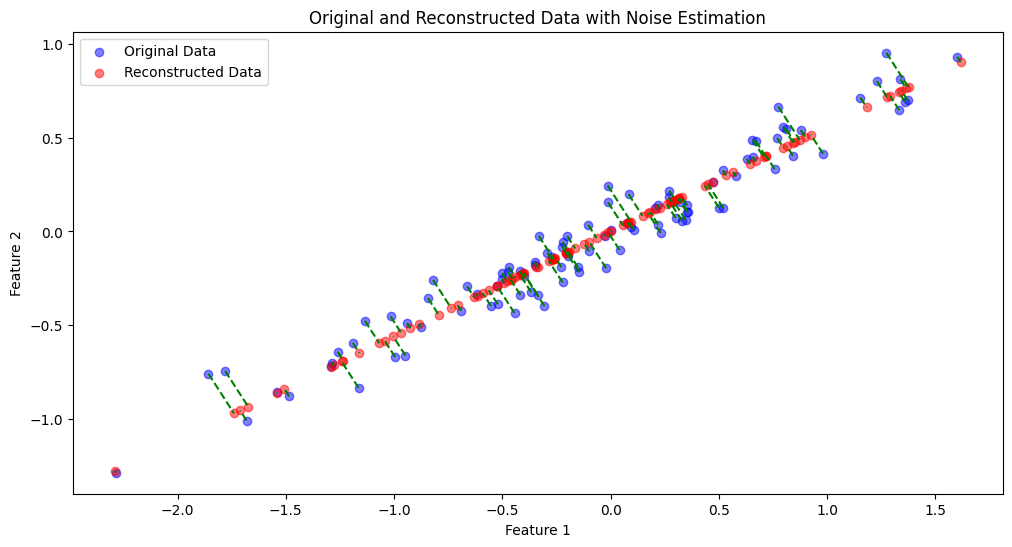

Explained Variance Ratio: [0.98929835 0.01070165]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate synthetic data with elliptical shape
np.random.seed(42)
n_samples = 100
n_features = 2
n_signal = 1  # Number of signal dimensions

# Signal component
signal = np.random.randn(n_samples, n_signal)

# Create an elliptical distribution by scaling one dimension
scale_factor = 0.1
ellipse_noise = np.hstack((signal, scale_factor * np.random.randn(n_samples, 1)))

# Rotate the ellipse to random angle
theta = np.radians(30)
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta),  np.cos(theta)]])
data = ellipse_noise @ rotation_matrix.T

# 1. Center the data by subtracting the mean
mean_data = np.mean(data, axis=0)
centered_data = data - mean_data

# 2. Compute the covariance matrix of the centered data
cov_matrix = np.cov(centered_data, rowvar=False)

# 3. Apply PCA to the centered data
pca = PCA()
pca.fit(centered_data)
components = pca.transform(centered_data)
explained_variance = pca.explained_variance_ratio_

# 4. Reconstruct the data using the top principal components
n_components = n_signal
reconstructed_centered_data = np.dot(components[:, :n_components], pca.components_[:n_components, :])

# Add the mean back to get the reconstructed data
reconstructed_data = reconstructed_centered_data + mean_data

# 5. Estimate noise
noise_estimated = data - reconstructed_data

# Plot original data, reconstructed data, and noise
plt.figure(figsize=(12, 6))

# Original and reconstructed data with noise estimation lines

plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Original Data', color='blue')
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], alpha=0.5, label='Reconstructed Data', color='red')

# Draw lines showing the noise estimation
for i in range(n_samples):
    plt.plot([data[i, 0], reconstructed_data[i, 0]], [data[i, 1], reconstructed_data[i, 1]], 'g--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Original and Reconstructed Data with Noise Estimation')


plt.show()

# Print explained variance
print("Explained Variance Ratio:", explained_variance)


### Some notes in Denoising with PCA

- Principal Component Analysis (PCA) is widely used for denoising data due to its ability to capture the underlying structure of the data by analyzing the covariance matrix. In PCA-based denoising, the idea is to exploit the principal components (directions of maximum variance) to approximate the signal while filtering out the noise. 

- Local vs. Global Denoising
Local Denoising: Methods like local averaging or filtering consider only neighboring points, which can be sensitive to the local structure of the data but may not capture global patterns.

- Global Denoising with PCA: PCA-based denoising uses global patterns by incorporating the entire dataset to compute the covariance matrix. It projects data points onto global principal components, thereby leveraging the full data structure for noise reduction.

e:\HadiSadoghiYazdi\.M_HomePage\Lib\site-packages\sklearn\decomposition\_pca.py:590: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


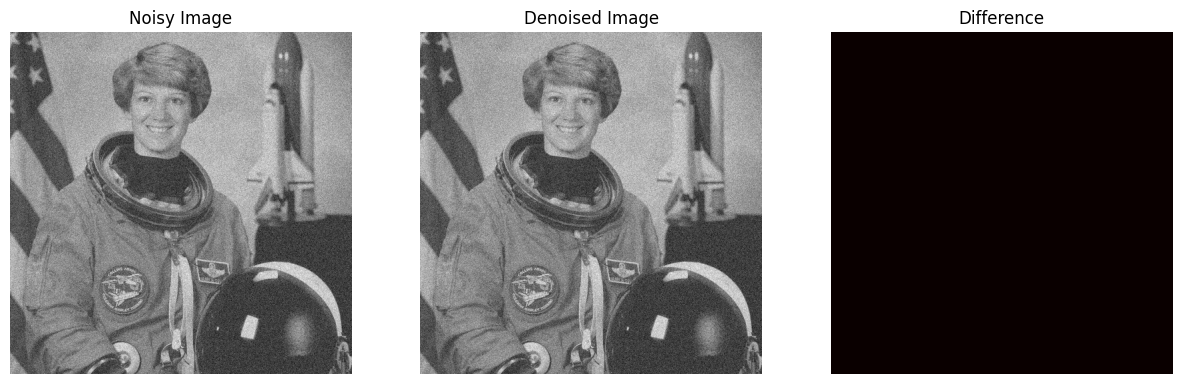

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import color, data, img_as_float

# Load and preprocess image
image = img_as_float(data.astronaut())  # Load an example image
gray_image = color.rgb2gray(image)  # Convert to grayscale
noisy_image = gray_image + 0.1 * np.random.normal(size=gray_image.shape)  # Add noise

# Flatten the images
image_flat = gray_image.flatten()
noisy_image_flat = noisy_image.flatten()

# Create the data matrix (example with multiple noisy images)
X = np.vstack([noisy_image_flat])  # In a real scenario, stack multiple images

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=0.6)  # Keep enough components to explain 95% variance
pca.fit(X_scaled)

# Reconstruct the image
components = pca.components_
mean_image = pca.mean_

# Reconstruct the data
X_reconstructed = pca.inverse_transform(pca.transform(X_scaled))
reconstructed_image = scaler.inverse_transform(X_reconstructed).reshape(gray_image.shape)

# Plot original, noisy, and denoised images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Denoised Image')
plt.imshow(reconstructed_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Difference')
plt.imshow(np.abs(noisy_image - reconstructed_image), cmap='hot')
plt.axis('off')

plt.show()

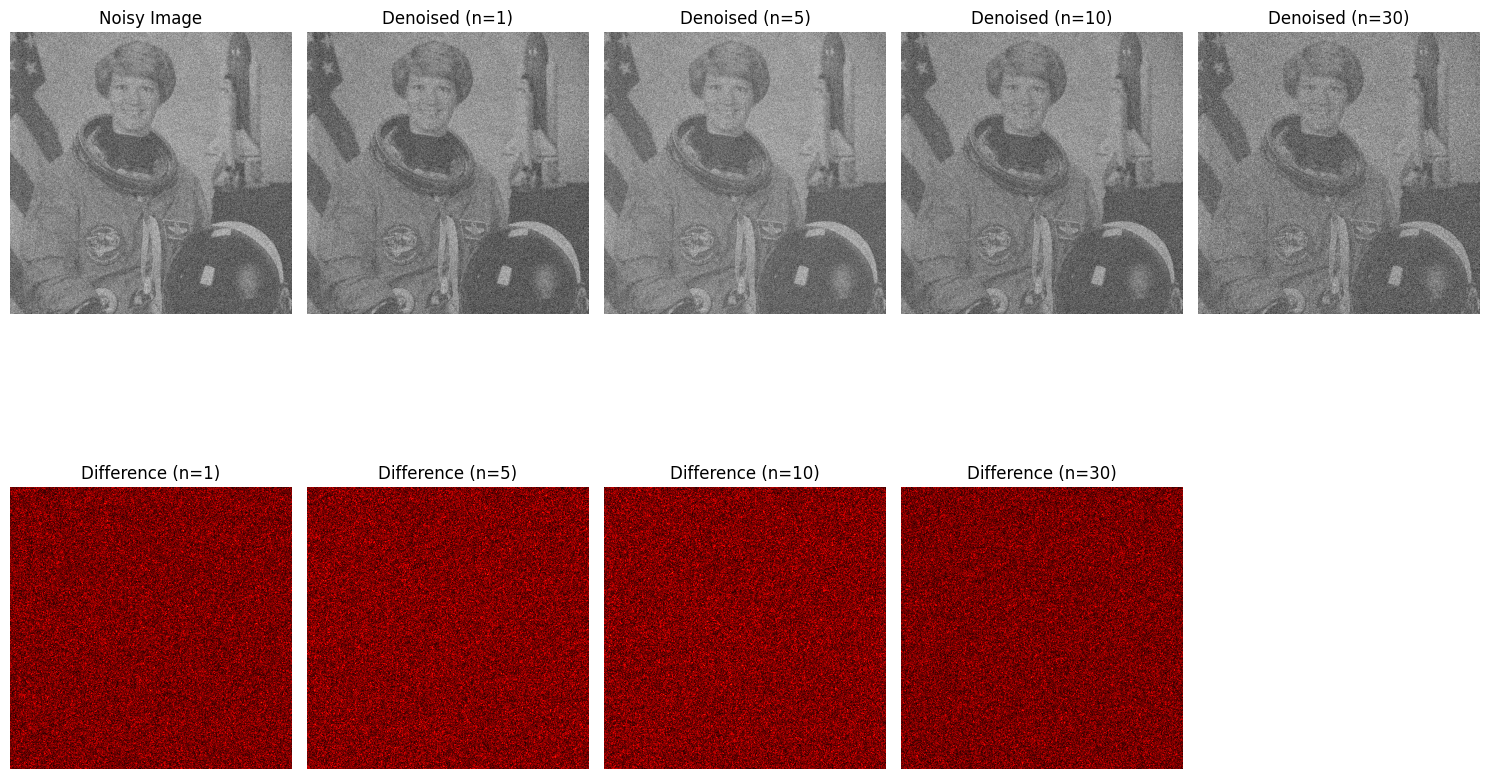

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import color, data, img_as_float

# Load and preprocess image
image = img_as_float(data.astronaut())  # Load an example image
gray_image = color.rgb2gray(image)  # Convert to grayscale
noisy_image = gray_image + 0.3 * np.random.normal(size=gray_image.shape)  # Add noise

# Flatten the image for PCA
image_flat = gray_image.flatten()
noisy_image_flat = noisy_image.flatten()

# Create multiple noisy samples for PCA
n_samples = 35 # Number of samples for PCA
X = np.array([noisy_image_flat] * n_samples)  # Simulate multiple noisy samples
X += 0.3 * np.random.normal(size=X.shape)  # Add slight variation to simulate multiple noisy images

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to reconstruct image with a given number of components
def reconstruct_image(n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    X_reconstructed = pca.inverse_transform(X_pca)
    
    # Inverse scaling
    X_reconstructed = scaler.inverse_transform(X_reconstructed)
    
    # Reshape the data back to the image shape
    reconstructed_image = X_reconstructed[0].reshape(gray_image.shape)
    
    return reconstructed_image

# Values of n_components to test
n_components_list = [1, 5, 10, 30]

# Plot original, noisy, and denoised images
plt.figure(figsize=(15, 10))

plt.subplot(2, len(n_components_list) + 1, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

for i, n_components in enumerate(n_components_list):
    if n_components > min(X.shape[0], X.shape[1]):
        # Skip invalid n_components
        continue

    denoised_image = reconstruct_image(n_components)
    difference = np.abs(noisy_image - denoised_image)
    
    plt.subplot(2, len(n_components_list) + 1, i + 2)
    plt.title(f'Denoised (n={n_components})')
    plt.imshow(denoised_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(2, len(n_components_list) + 1, len(n_components_list) + 2 + i)
    plt.title(f'Difference (n={n_components})')
    plt.imshow(difference, cmap='hot')
    plt.axis('off')

plt.tight_layout()
plt.show()
